## **About This Project**

**Background**

This project will focus on clinical variables that might be one of the factors to predict heart failure earlier. I have tried to build model before with considered clinical varibales only and tried to handling the outlier data with upper/lower limit datar distribution (Q1 and Q3). The result was not too great since i just got a recall 0.68, so i decided to re-build model with two defferent models:  Including outlier model and excluding outlier to find out which is better of them.

**Data Overview**

1. Age : Age of patient
2. Anemia : If patient has anemia (decrease of red blood cells or hemoglobin)
3. Creatinine_pospokinase : level of creatine in blood that can indicate there are injury from brain,heart,or muscle (mcg/L).
4. Diaetes : if patient has diabetes
5. Ejection_fraction : Percentage of blood leaving the hearth at each heart muscle constraction (percentage)
6. High_blood_pressure : if the patient has hypertension history
7. Platelets : level of platelets in blood (kiloplatelets/mL).
8. Serum_creatinine : level of serum creatinine in blood that can measure how good kidney function (mg/dL).
9. Serum_sodium : Level of serum sodium in the blood that can measure balance of electrolyte and water in blood vessels (mEq/L).
10. Sex : Women or Man (Non biner is not accepted)
11. Smoking : if the patient is smoker or not
12. Time : Follow-up perioed (days)
13. Death_event : if the patient deceased during the folloe-up period

## **Preparation**

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

### Load Dataset

In [392]:
# Load data
sc= r'C:\Users\fahru\Documents\Python_Code\Prediction Model\heart_failure_clinical_records_dataset.csv'
data=pd.read_csv(sc)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**NOTE**

Drop time column because only focus on clinical variables.

In [394]:

datac= data.drop(columns='time')
datac.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


### Data Understanding

**NOTE**

Patient clasified on 'Death_Event':

- 0 : survived patient 
- 1 : deceased patient

Patient clasified by sex:

- 0 : Women 
- 1 : Male

Patient clasified on another bolean data type(aneamia,diabetes,high_blood_fraction,smoking)

- 0 : Absence
- 1 : Presence

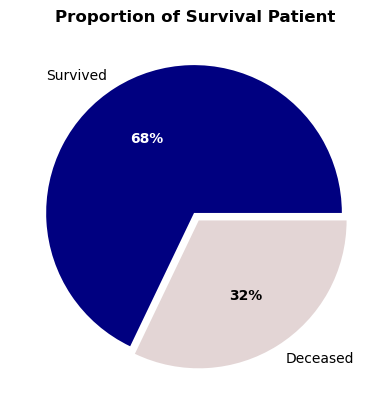

In [395]:
# Survival Rate Patient

surv= datac.groupby('DEATH_EVENT')['sex'].count().reset_index(name='Number of Patient')

_,labels,autopct= plt.pie(x=surv['Number of Patient'], autopct='%.0f%%', labels=['Survived','Deceased'],
            colors=['navy',"#E3D5D5"], explode=(0.01,0.05))
plt.setp(autopct[0], color='white', weight='bold')
plt.setp(autopct[1], weight='bold')

plt.title('Proportion of Survival Patient', fontdict={'weight':'bold'})
plt.show()

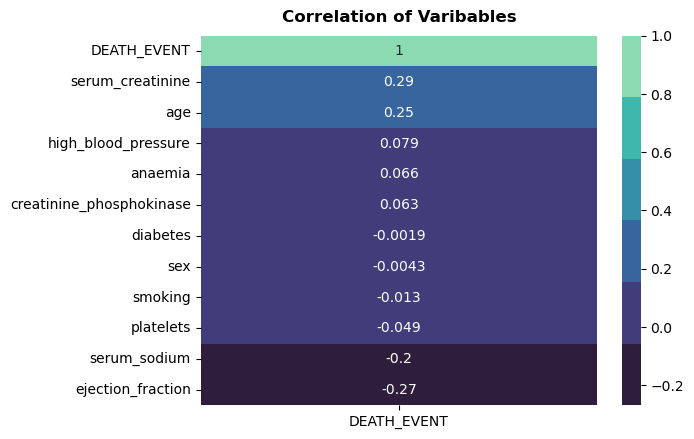

In [396]:
# Correlation Between Death Event Variable and Each Other
from sklearn.preprocessing import LabelEncoder

encod= LabelEncoder()
dd= datac.copy()
dd['DEATH_EVENT']= encod.fit_transform(dd['DEATH_EVENT'])

sns.heatmap(dd.corr().sort_values('DEATH_EVENT',ascending=False)[['DEATH_EVENT']], 
            annot=True, cmap=sns.color_palette('mako'))
plt.title('Correlation of Varibables', pad=10, weight='bold')
plt.show()

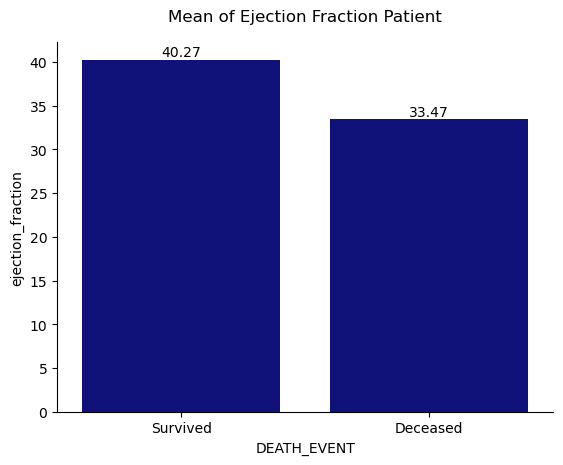

In [397]:
# Proportion of ejection_fractaion 
ejec= datac.groupby('DEATH_EVENT')['ejection_fraction'].mean().round(2).reset_index()
ax= sns.barplot(data=ejec, x='DEATH_EVENT', y='ejection_fraction', color='darkblue')
for x in ax.containers:
    ax.bar_label(x)
plt.xticks(ticks=ejec['DEATH_EVENT'], labels=['Survived','Deceased'])

plt.title('Mean of Ejection Fraction Patient', pad=15)
sns.despine(bottom=False, left=False)
plt.show()

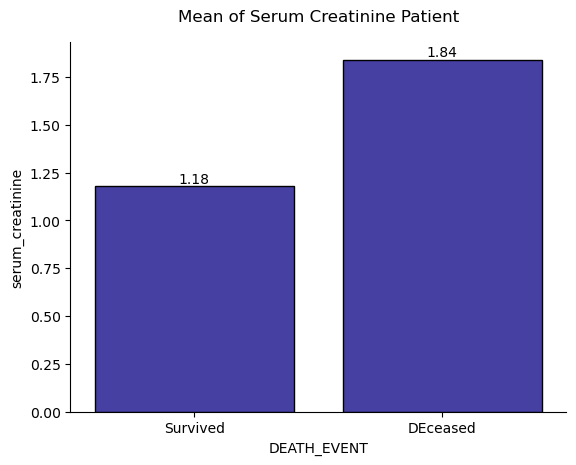

In [398]:
# Proportionn of Serum Creatine

serum= datac.groupby('DEATH_EVENT')['serum_creatinine'].mean().round(2).reset_index()
ax= sns.barplot(data=serum, x='DEATH_EVENT', y='serum_creatinine', color="#3930B3", edgecolor='black')
for x in ax.containers:
    ax.bar_label(x)
plt.xticks(ticks=serum['DEATH_EVENT'], labels=['Survived','DEceased'])

plt.title('Mean of Serum Creatinine Patient', pad=15)
sns.despine(bottom=False, left=False)
plt.show()

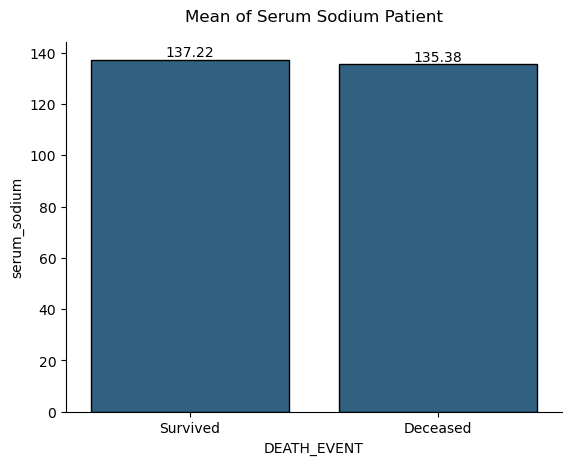

In [399]:
# Proportionn of Serum Sodium

serum= datac.groupby('DEATH_EVENT')['serum_sodium'].mean().round(2).reset_index()
ax= sns.barplot(data=serum, x='DEATH_EVENT', y='serum_sodium', color="#23648D", edgecolor='black')
for x in ax.containers:
    ax.bar_label(x)
plt.xticks(ticks=serum['DEATH_EVENT'], labels=['Survived','Deceased'])

plt.title('Mean of Serum Sodium Patient', pad=15)
sns.despine(bottom=False, left=False)
plt.show()

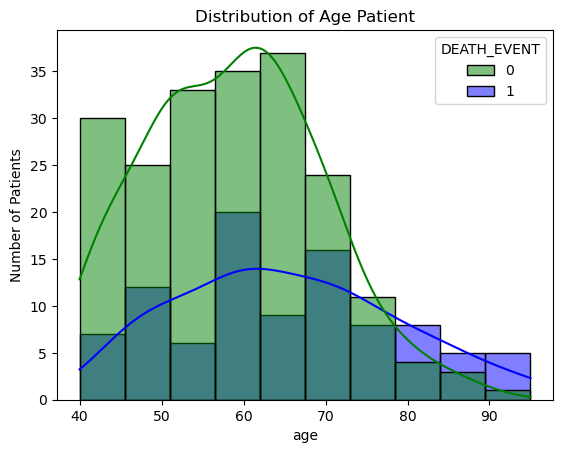

In [400]:
# Distribution of Age Patient
ax= sns.histplot(data=datac, x='age', hue='DEATH_EVENT',kde=True, palette=['green','blue'])
plt.ylabel('Number of Patients')

plt.title('Distribution of Age Patient')
plt.show()

## **Data Preparation**

### Data Handling

In [401]:
# Data null check
datac.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

In [402]:
# Data duplicate check
datac.duplicated().sum()

np.int64(0)

In [403]:
# Data Outlier Check
from scipy import stats

score= stats.zscore(datac)
zz= score[(score>3) | (score<-3)]
print(np.sort(zz))

[-5.36320604 -4.68217606 -3.54712608  3.49157257  3.49166818  3.49363727
  3.5477164   3.66284274  4.08620602  4.26627752  4.55675602  4.776848
  4.902082    5.23453919  5.47161938  6.00817985  7.35049592  7.36471488
  7.51463953  7.75201955]


We try use Q1 and Q3 values frim each group of outlier to outlier handling at this time.

In [404]:
# Outlier Handling 

datac_ex= datac.copy()

def HO(data,colum):
    col=colum
    for o, col in enumerate(col):
        for i in [col]:
            Q3, Q1, = np.quantile(data.loc[:,i], [0.75, 0.25])
            IQR= Q3-Q1
            data.loc[data[i]>Q3+1.5*IQR,col]= Q3.astype(int)
            data.loc[data[i]<Q1-1.5*IQR,col]= Q1.astype(int)

HO(datac_ex,datac_ex.columns)
datac_ex.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,582,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,1.0,134,0,0,1


In [405]:
# Check Outlier again
score= stats.zscore(datac_ex)
zz= score[(score>3) | (score<-3)]
print(np.sort(zz))

[-3.07424218  3.02029888  3.02029888  3.02029888  3.02029888  3.02029888
  3.02874645  3.07992571  3.0908927   3.12379365]


The result better than before and still around of zscore limit which is between -3 and 3. 

### Dataset for Experiment

In [406]:
# Dataset excludine outlier
# Experiment 1 (excluding outlier)
exp1= datac_ex
# Experimetn 2 (including outlier)
exp2= datac

## **Data Transformation**

### Experiment 1 (Excluding Outlier)

Seperate independent and Dependent variables(DEATH_EVENT)

In [407]:
# Experiment 1
exp1_predic= exp1[exp1.columns.difference(['DEATH_EVENT'])]
exp1_predic.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,582,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,1.0,134,0,0


Seperate Categorical and Numerical data from Predictor variables.

Categorical Data

In [408]:
# Experiment 1
# Change data type
exp1_predic[['anaemia','diabetes','high_blood_pressure','sex','smoking']]= exp1_predic[['anaemia','diabetes','high_blood_pressure'
                                                                              ,'sex','smoking']].astype(str)
# Encoding Categorical data
exp1_predic= pd.get_dummies(exp1_predic, dtype=int)
exp1_predic.head()

C:\Users\fahru\AppData\Local\Temp\ipykernel_9300\3032163774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp1_predic[['anaemia','diabetes','high_blood_pressure','sex','smoking']]= exp1_predic[['anaemia','diabetes','high_blood_pressure'


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,75.0,582,20,265000.00,1.9,130,1,0,1,0,0,1,0,1,1,0
1,55.0,582,38,263358.03,1.1,136,1,0,1,0,1,0,0,1,1,0
2,65.0,146,20,162000.00,1.3,129,1,0,1,0,1,0,0,1,0,1
3,50.0,111,20,210000.00,1.9,137,0,1,1,0,1,0,0,1,1,0
4,65.0,160,20,327000.00,1.0,134,0,1,0,1,1,0,1,0,1,0


In [409]:
# Categorical Columns

# Experiment 1
exp1_cat_col= exp1_predic.columns[6:]
print(exp1_cat_col)

Index(['anaemia_0', 'anaemia_1', 'diabetes_0', 'diabetes_1',
       'high_blood_pressure_0', 'high_blood_pressure_1', 'sex_0', 'sex_1',
       'smoking_0', 'smoking_1'],
      dtype='object')


In [410]:
# Define Categorycal Data
# # Experiment 1
exp1_pred_cat= exp1_predic[exp1_cat_col]
exp1_pred_cat.head()

,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,1,0,1,0,0,1,0,1,1,0
1,1,0,1,0,1,0,0,1,1,0
2,1,0,1,0,1,0,0,1,0,1
3,0,1,1,0,1,0,0,1,1,0
4,0,1,0,1,1,0,1,0,1,0


 Numerical Data

In [411]:
# Numerical Columns

# Experiment 1
exp1_num_col= exp1_predic.columns[:6]
print(exp1_num_col)

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'],
      dtype='object')


In [412]:
# Define Numerical Data
# Experiment 1
exp1_pred_num= exp1_predic[exp1_num_col]
exp1_pred_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,582,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,1.0,134


In [413]:
# Standardization Numerical Data
from sklearn.preprocessing import StandardScaler

std= StandardScaler()
exp1_pred_num= pd.DataFrame(std.fit_transform(exp1_pred_num))
exp1_pred_num.columns=exp1_num_col
exp1_pred_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,1.192945,0.824382,-1.564881,0.135658,2.402033,-1.775205
1,-0.491279,0.824382,0.010243,0.110996,-0.071028,-0.216361
2,0.350833,-0.769486,-1.564881,-1.411386,0.547237,-2.035013
3,-0.912335,-0.897434,-1.564881,-0.690433,2.402033,0.043446
4,0.350833,-0.718307,-1.564881,1.066889,-0.380161,-0.735976


In [414]:
# Merge Data For Independent Variables
# Experiment 1
X1=pd.concat([exp1_pred_num,exp1_pred_cat], axis=1)
X1.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,1.192945,0.824382,-1.564881,0.135658,2.402033,-1.775205,1,0,1,0,0,1,0,1,1,0
1,-0.491279,0.824382,0.010243,0.110996,-0.071028,-0.216361,1,0,1,0,1,0,0,1,1,0
2,0.350833,-0.769486,-1.564881,-1.411386,0.547237,-2.035013,1,0,1,0,1,0,0,1,0,1
3,-0.912335,-0.897434,-1.564881,-0.690433,2.402033,0.043446,0,1,1,0,1,0,0,1,1,0
4,0.350833,-0.718307,-1.564881,1.066889,-0.380161,-0.735976,0,1,0,1,1,0,1,0,1,0


Check correlation each independnt variables to avoid high relationship between them. Correlation values more than 0.7 will be drop.

<Axes: >

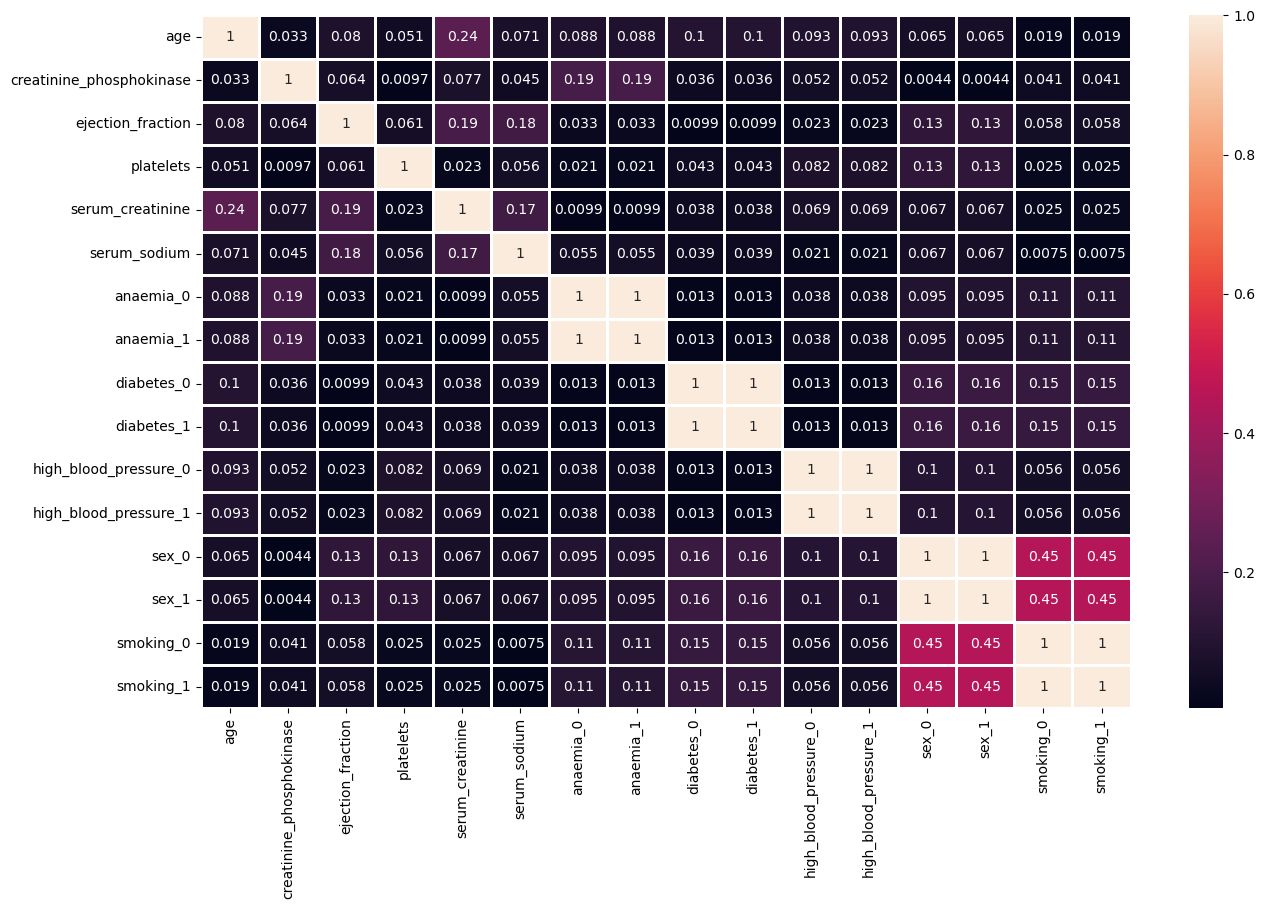

In [415]:
# Check correlation 
cor= X1.corr().abs()     ## Abs because we don't need correlation direction

plt.figure(figsize=(15,9))
sns.heatmap(cor, annot=True, linewidths=2)

<Axes: >

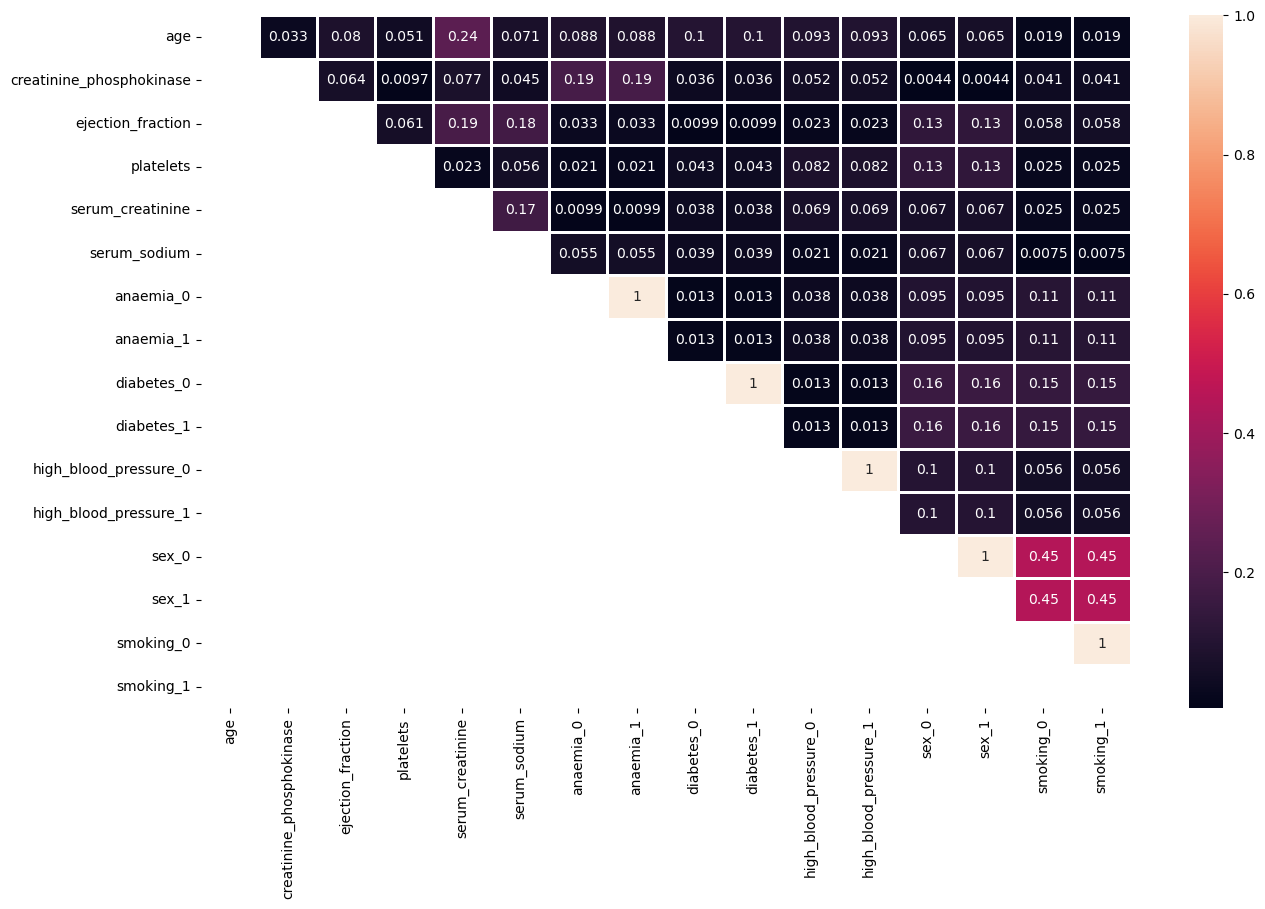

In [416]:
# Remove Redundant 
up= cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

plt.figure(figsize=(15,9))
sns.heatmap(up, annot=True, linewidths=2)

In [417]:
# Identify every corr value more than 0.7
drop_list= [i for i in up.columns if any(up[i]>0.7)]
drop_list

['anaemia_1', 'diabetes_1', 'high_blood_pressure_1', 'sex_1', 'smoking_1']

In [418]:
# Drop Every columns
X1= X1.drop(columns=drop_list)
X1.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_0,diabetes_0,high_blood_pressure_0,sex_0,smoking_0
0,1.192945,0.824382,-1.564881,0.135658,2.402033,-1.775205,1,1,0,0,1
1,-0.491279,0.824382,0.010243,0.110996,-0.071028,-0.216361,1,1,1,0,1
2,0.350833,-0.769486,-1.564881,-1.411386,0.547237,-2.035013,1,1,1,0,0
3,-0.912335,-0.897434,-1.564881,-0.690433,2.402033,0.043446,0,1,1,0,1
4,0.350833,-0.718307,-1.564881,1.066889,-0.380161,-0.735976,0,0,1,1,1


In [419]:
# Define Dependent Variables

# Experiment 1
Y1= datac_ex['DEATH_EVENT']
print(Y1.head())

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64


### Experiment 2 (including Outlier)

Do the same thing as Experiment 1 did.

Seperate between independent and dependent variables.

In [420]:
# Experiment 2
exp2_predic= exp2[exp2.columns.difference(['DEATH_EVENT'])]
exp2_predic.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0


Seperate between Categorical and Numerical Data.

Categorical Data

In [421]:
# Experiment 2
# Change data type
exp2_predic[['anaemia','diabetes','high_blood_pressure','sex','smoking']]= exp2_predic[['anaemia','diabetes','high_blood_pressure'
                                                                              ,'sex','smoking']].astype(str)
# Encoding Categorical data
exp2_predic= pd.get_dummies(exp2_predic, dtype=int)
exp2_predic.head()

C:\Users\fahru\AppData\Local\Temp\ipykernel_9300\3317234662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp2_predic[['anaemia','diabetes','high_blood_pressure','sex','smoking']]= exp2_predic[['anaemia','diabetes','high_blood_pressure'


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,75.0,582,20,265000.00,1.9,130,1,0,1,0,0,1,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,1,0,1,0,1,0,0,1,1,0
2,65.0,146,20,162000.00,1.3,129,1,0,1,0,1,0,0,1,0,1
3,50.0,111,20,210000.00,1.9,137,0,1,1,0,1,0,0,1,1,0
4,65.0,160,20,327000.00,2.7,116,0,1,0,1,1,0,1,0,1,0


In [422]:
# Experiment 2
exp2_cat_col= exp2_predic.columns[6:]
print(exp2_cat_col)

Index(['anaemia_0', 'anaemia_1', 'diabetes_0', 'diabetes_1',
       'high_blood_pressure_0', 'high_blood_pressure_1', 'sex_0', 'sex_1',
       'smoking_0', 'smoking_1'],
      dtype='object')


In [423]:
# Experiment 2
exp2_pred_cat= exp2_predic[exp2_cat_col]
exp2_pred_cat.head()

,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,1,0,1,0,0,1,0,1,1,0
1,1,0,1,0,1,0,0,1,1,0
2,1,0,1,0,1,0,0,1,0,1
3,0,1,1,0,1,0,0,1,1,0
4,0,1,0,1,1,0,1,0,1,0


Numerical Data

In [424]:
# Experiment 2
exp2_num_col= exp2_predic.columns[:6]
print(exp2_num_col)

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'],
      dtype='object')


In [425]:
# Define Numerical Data
# Experiment 2
exp2_pred_num= exp2_predic[exp2_num_col]
exp2_pred_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116


In [426]:
# Standardization Numerical Data
from sklearn.preprocessing import StandardScaler

std= StandardScaler()
exp2_pred_num= pd.DataFrame(std.fit_transform(exp2_pred_num))
exp2_pred_num.columns=exp2_num_col
exp2_pred_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176


In [427]:
# Experiment 2
X2= pd.concat([exp2_pred_num, exp2_pred_cat], axis=1)
X2.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,1,0,1,0,0,1,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,1,0,1,0,1,0,0,1,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,1,0,1,0,1,0,0,1,0,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,0,1,1,0,1,0,0,1,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,0,1,0,1,1,0,1,0,1,0


Check correlation each independnt variables to avoid high relationship between them. Correlation values more than 0.7 will be drop.

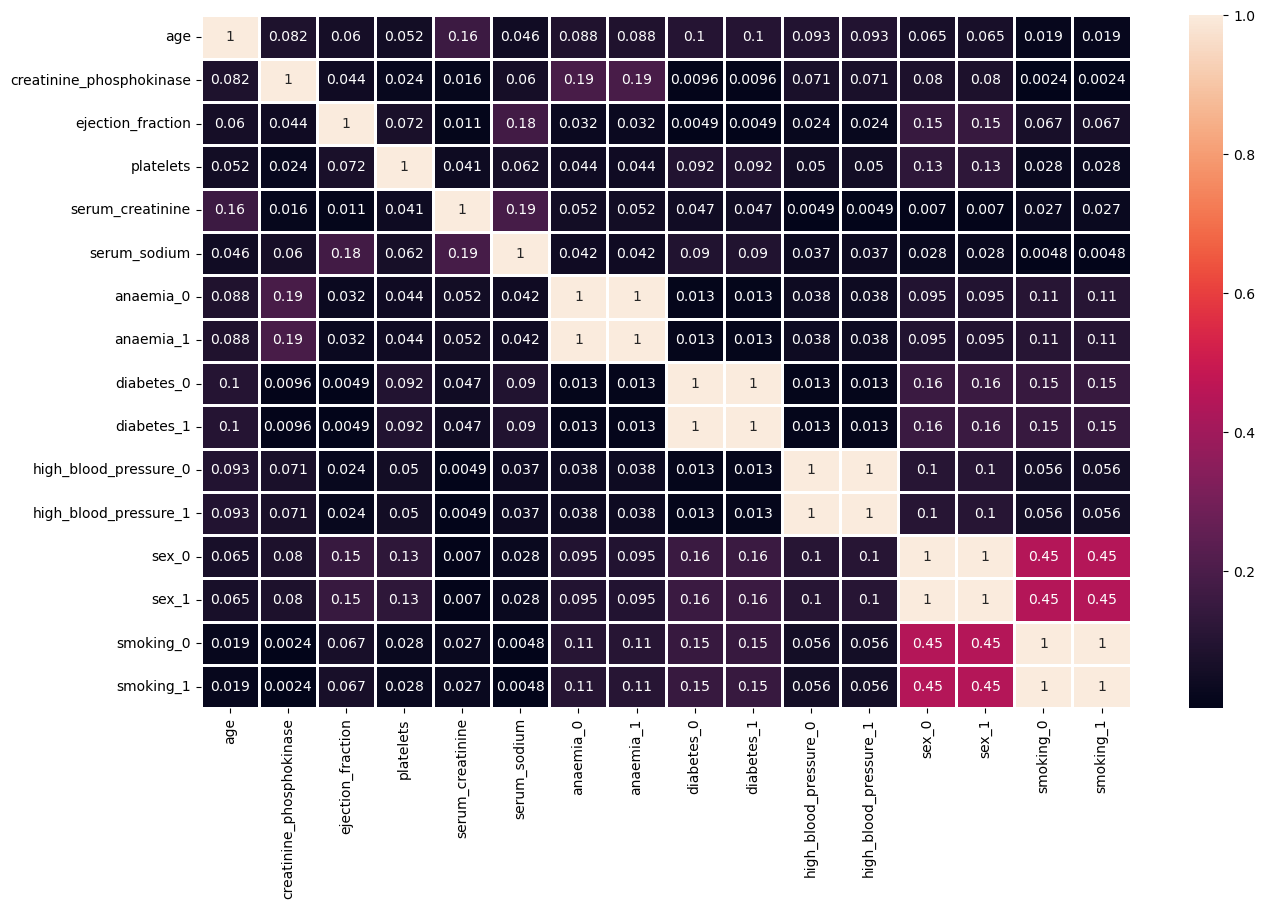

In [428]:
# Check Correaltion
cor2= X2.corr().abs()

plt.figure(figsize=(15,9))
sns.heatmap(cor2, annot=True, linewidths=2)

plt.show()

<Axes: >

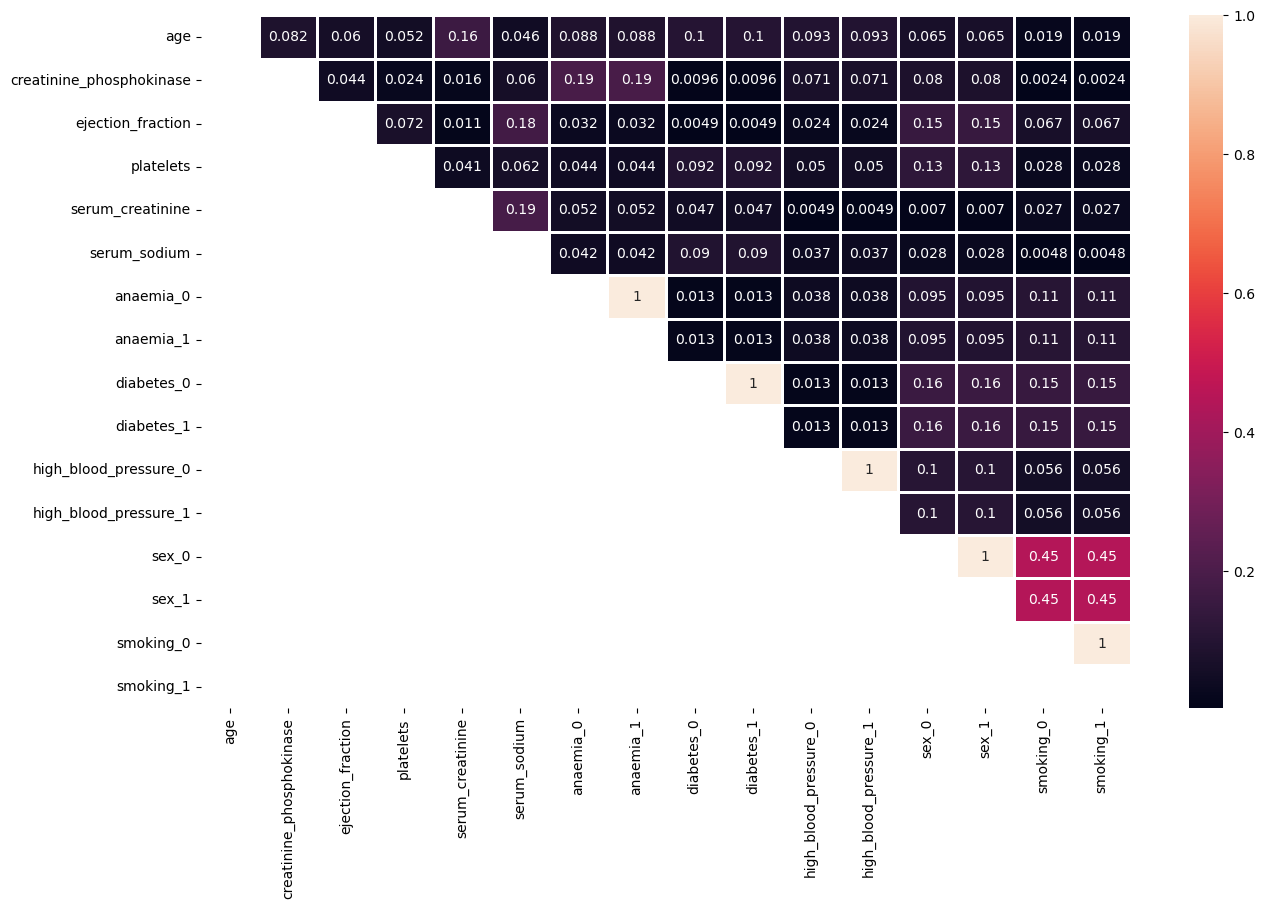

In [429]:
# Remove Redundant from matrix
up2= cor2.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

plt.figure(figsize=(15,9))
sns.heatmap(up2, annot=True, linewidths=2)


In [430]:
# Identiy every corr value more than 0.7
drop_list2= [k for k in up2.columns if any(up2[k]>0.7)]
drop_list2

['anaemia_1', 'diabetes_1', 'high_blood_pressure_1', 'sex_1', 'smoking_1']

In [431]:
# Drop every colomns within drop list
X2= X2.drop(columns=drop_list2)
X1.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_0,diabetes_0,high_blood_pressure_0,sex_0,smoking_0
0,1.192945,0.824382,-1.564881,0.135658,2.402033,-1.775205,1,1,0,0,1
1,-0.491279,0.824382,0.010243,0.110996,-0.071028,-0.216361,1,1,1,0,1
2,0.350833,-0.769486,-1.564881,-1.411386,0.547237,-2.035013,1,1,1,0,0
3,-0.912335,-0.897434,-1.564881,-0.690433,2.402033,0.043446,0,1,1,0,1
4,0.350833,-0.718307,-1.564881,1.066889,-0.380161,-0.735976,0,0,1,1,1


In [432]:
# Define Dependent Variables

# Experiment 2
Y2= datac['DEATH_EVENT']
print(Y2.head())

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64


## **Splitting Dataset**

Splitting Dataset to data train and test. Proportion of these data set is 70% of data train and 30% of data test.

### Experiment 1

In [433]:
# Split Dataset
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test= train_test_split(X1, Y1, test_size=0.3, stratify=Y1, random_state=30)
print(len(x1_train))
print(len(x1_test))

209
90


### Experiment 2

In [434]:
# Split Dataset
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test= train_test_split(X2, Y2, test_size=0.3, stratify=Y2, random_state=30)
print(len(x2_train))
print(len(x2_test))

209
90


## **Modelling**

Use Logistic regression and gradient boosting algorithm for build a model. Also use GridsearchCV to find the best hyper-parameters. 

In [435]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, precision_score, recall_score,f1_score

### Logistic Regression

#### Experiment 1

In [436]:
# Define Hyperparamter

penalty = ['l2']
tol = [0.001, 0.0001, 0.00001]
C = [100.0, 10.0, 1.00, 0.1, 0.01, 0.001]
fit_intercept = [True, False]
intercept_scaling = [1.0, 0.75, 0.5, 0.25]
class_weight = ['balanced', None]
solver = ['newton-cg', 'sag', 'lbfgs', 'saga']
max_iter=[14000]
param_distributions = dict(penalty=penalty, tol=tol, C=C, fit_intercept=fit_intercept,
                           intercept_scaling=intercept_scaling,
                           class_weight=class_weight, solver=solver, max_iter=max_iter)

In [437]:
# Create Model
from sklearn.linear_model import LogisticRegression

metode= LogisticRegression()
log_grid= GridSearchCV(estimator=metode, param_grid=param_distributions, scoring='recall', cv=5, n_jobs=-1)

start= time.time()
log_result= log_grid.fit(x1_train,y1_train)

print(f'Best Score: {log_result.best_score_} using hyperparameter: {log_result.best_params_}')
print(f'Running time: {str(round((time.time()-start),2))} second')

Best Score: 0.7461538461538462 using hyperparameter: {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 1.0, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001}
Running time: 9.86 second


#### Experiment 2

In [438]:
# Define Hyperparamter

penalty = ['l2']
tol = [0.001, 0.0001, 0.00001]
C = [100.0, 10.0, 1.00, 0.1, 0.01, 0.001]
fit_intercept = [True, False]
intercept_scaling = [1.0, 0.75, 0.5, 0.25]
class_weight = ['balanced', None]
solver = ['newton-cg', 'sag', 'lbfgs', 'saga']
max_iter=[14000]
param_distributions = dict(penalty=penalty, tol=tol, C=C, fit_intercept=fit_intercept,
                           intercept_scaling=intercept_scaling,
                           class_weight=class_weight, solver=solver, max_iter=max_iter)

In [439]:
# Create Model

metode= LogisticRegression()
log_grid2= GridSearchCV(estimator=metode, param_grid=param_distributions, scoring='recall', cv=5, n_jobs=-1)

log_result2= log_grid2.fit(x2_train,y2_train)

print(f'Best Score: {log_result2.best_score_} using hyperparameter: {log_result2.best_params_}')
print(f'Running time: {str(round((time.time()-start),2))} second')

Best Score: 0.7307692307692307 using hyperparameter: {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 1.0, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001}
Running time: 15.27 second


### Gradient Boosting

#### Experiment 1

In [440]:
# Define Hyperparamerter

gbparameter = {'max_depth':[5,10,15],'gamma':[0.0,0.1,0.2,0.3], 'n_estimators':[25,50,75,100],
               'learning_rate':[0.05,0.1,0.2,0.3], 'scale_pos_weight':[1,3]}
score=['recall','accuracy', 'precision']

In [441]:
# Create Model
from xgboost import XGBClassifier

metode= XGBClassifier()
gb_grid1= GridSearchCV(estimator=metode, param_grid=gbparameter, scoring=score, refit='recall', verbose=0, cv=5, n_jobs=-1)

start= time.time()
gb_result1= gb_grid1.fit(x1_train,y1_train)

print(f'Best Score: {gb_result1.best_score_} using hyperparameter: {gb_result1.best_params_}')
print(f'Accuracy of best recall: {gb_result1.cv_results_['mean_test_accuracy'][gb_result1.best_index_]}')
print(f'Running time: {str(round((time.time()-start),2))} second')

Best Score: 0.6307692307692309 using hyperparameter: {'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 25, 'scale_pos_weight': 3}
Accuracy of best recall: 0.683855981416957
Running time: 8.25 second


#### Experiment 2

In [442]:
# Define Hyperparamerter

gbparameter = {'max_depth':[5,10,15],'gamma':[0.0,0.1,0.2,0.3], 'n_estimators':[25,50,75,100],
               'learning_rate':[0.05,0.1,0.2,0.3], 'scale_pos_weight':[1,3]}
score=['recall','accuracy', 'precision']

In [443]:
# Create model

metode= XGBClassifier()
gb_grid2= GridSearchCV(estimator=metode, param_grid=gbparameter, scoring=score, refit='recall', verbose=0, cv=5, n_jobs=-1)

gb_result2= gb_grid2.fit(x2_train,y2_train)

print(f'Best Score: {gb_result2.best_score_} using hyperparameter: {gb_result2.best_params_}')
print(f'Accuracy of best recall: {gb_result2.cv_results_['mean_test_accuracy'][gb_result2.best_index_]}')
print(f'Running time: {str(round((time.time()-start),2))} second')

Best Score: 0.7197802197802198 using hyperparameter: {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 25, 'scale_pos_weight': 3}
Accuracy of best recall: 0.7275261324041813
Running time: 15.02 second


## **Evaluation**

### Linear Regression

#### Experiment 1

In [444]:
# Evaluation Linear regression
from sklearn import metrics

y1_pred= log_grid.predict(x1_test)

print(f'Accuracy: {metrics.accuracy_score(y1_test,y1_pred)}')
print(f'Recall: {metrics.recall_score(y1_test,y1_pred)}')

Accuracy: 0.6777777777777778
Recall: 0.6896551724137931


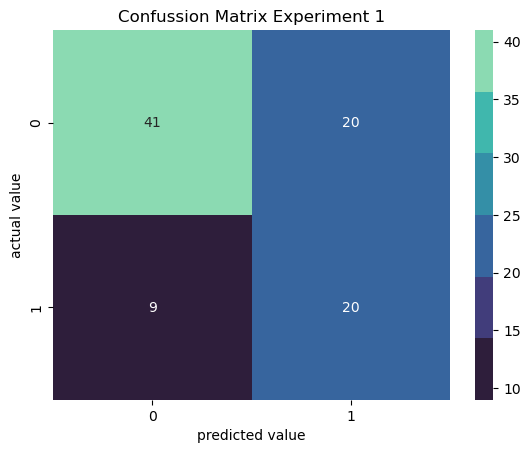

In [445]:
# Confussion Matrix

confus= confusion_matrix(y1_test,y1_pred)
sns.heatmap(confus, annot=True, cmap=sns.color_palette('mako'))
plt.title('Confussion Matrix Experiment 1')
plt.xlabel('predicted value')
plt.ylabel('actual value')

plt.show()

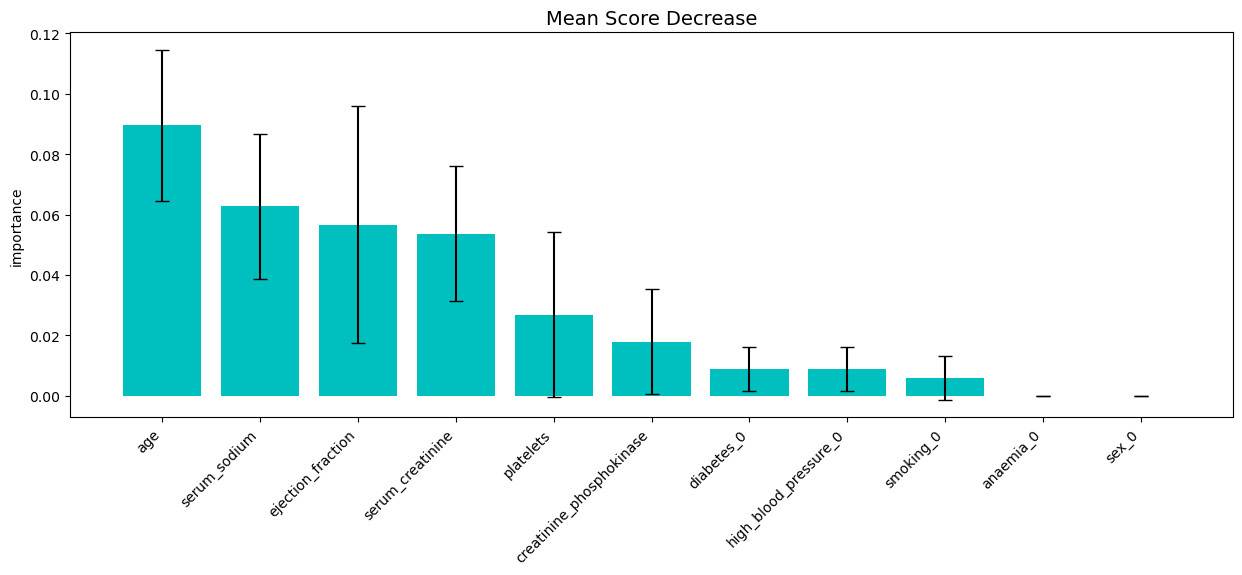

In [446]:
# Most importance variable by model to predict the best recall
from jcopml.feature_importance import mean_score_decrease

cek_log= mean_score_decrease(x1_train,y1_train, log_grid, plot=True, topk=20)

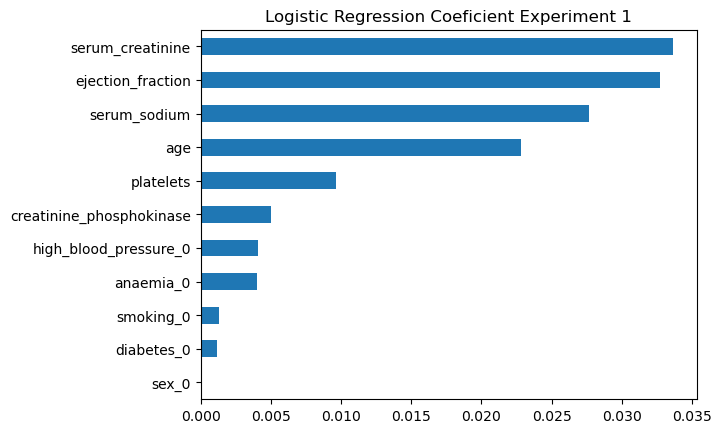

In [447]:
# How each predictor variables affect the prediction Value
log_best1= log_result.best_params_
log= LogisticRegression(C=log_best1['C'], class_weight=log_best1['class_weight'], fit_intercept=log_best1['fit_intercept'],
                          intercept_scaling=log_best1['intercept_scaling'], max_iter=log_best1['max_iter'],
                          penalty=log_best1['penalty'], solver=log_best1['solver'], tol=log_best1['tol'])
model1=log.fit(x1_train,y1_train)
y1_log_pred= model1.predict(x1_test)
# print(recall_score(y1_test,y1_log_pred))
# print(accuracy_score(y1_test,y1_log_pred))
variable= X1.columns
coef= model1.coef_[0]
coef_data= pd.Series(abs(coef), index=variable)

coef_data.sort_values(ascending=True).plot(kind='barh')
plt.title('Logistic Regression Coeficient Experiment 1')

plt.show()

#### Experiment 2

In [448]:
# Evaluation Model

y2_pred= log_grid2.predict(x2_test)

print(f'Accuracy: {metrics.accuracy_score(y2_test,y2_pred)}')
print(f'Recall: {metrics.recall_score(y2_test,y2_pred)}')

Accuracy: 0.6444444444444445
Recall: 0.6551724137931034


The result shows there was not big difference between experiment 1 and experiment 2.

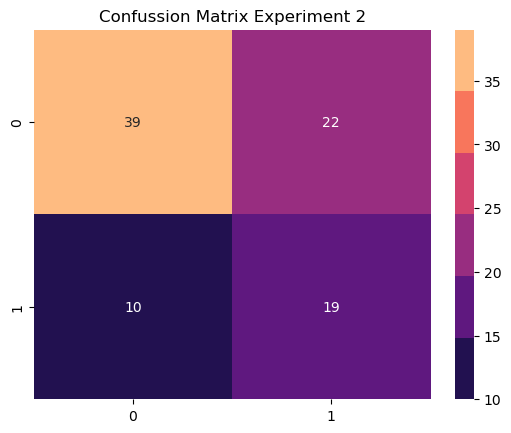

In [449]:
# Confussion Matrix

confus= confusion_matrix(y2_test, y2_pred)
sns.heatmap(confus, annot=True, cmap=sns.color_palette('magma'))
plt.title('Confussion Matrix Experiment 2')

plt.show()

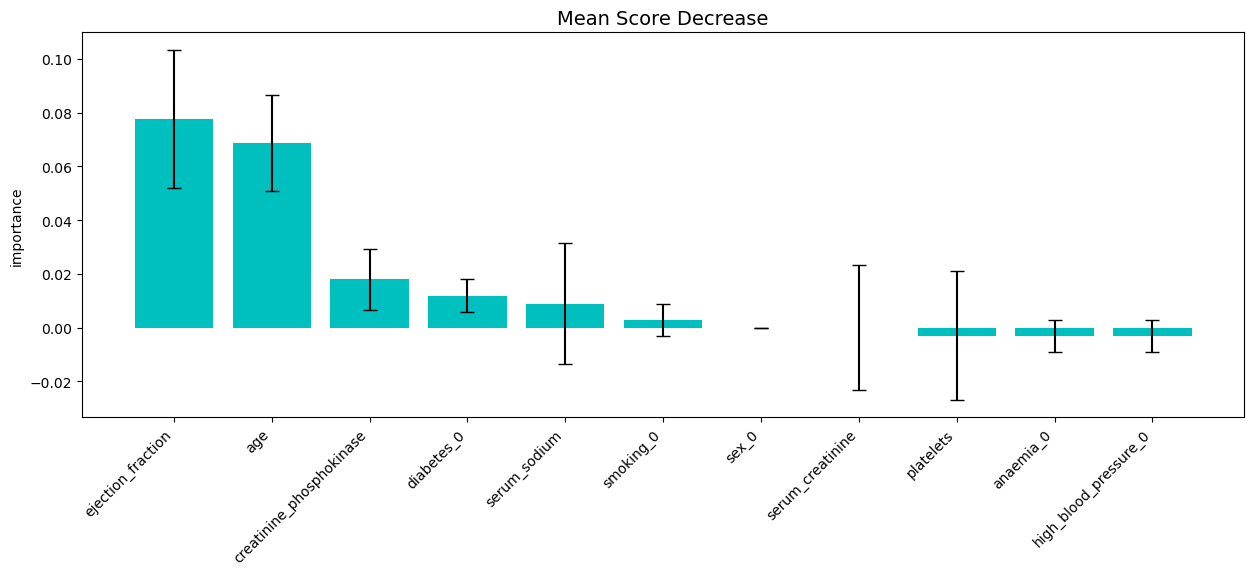

In [450]:
# Most condidered variable by model to predict the best recall

cek_log2= mean_score_decrease(x2_train,y2_train, log_grid2, plot=True, topk=20)

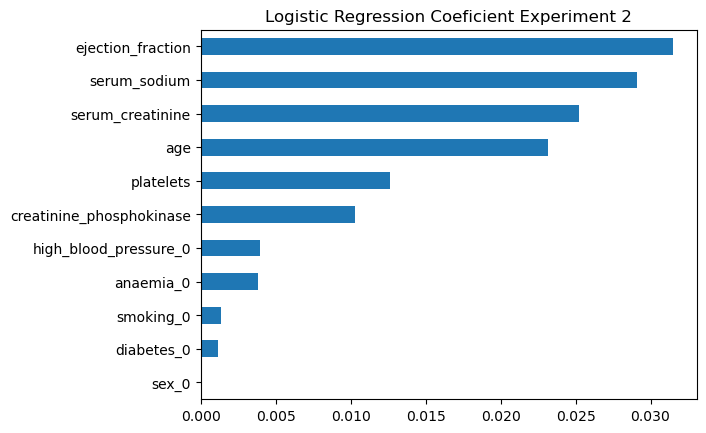

In [451]:
# How each predictor variables affect the prediction Value
log_best2= log_result2.best_params_
log= LogisticRegression(C=log_best2['C'], class_weight=log_best2['class_weight'], fit_intercept=log_best2['fit_intercept'],
                          intercept_scaling=log_best2['intercept_scaling'], max_iter=log_best2['max_iter'],
                          penalty=log_best2['penalty'], solver=log_best2['solver'], tol=log_best2['tol'])
model2=log.fit(x2_train,y2_train)
y2_log_pred= model2.predict(x1_test)

variable= X2.columns
coef= model2.coef_[0]
coef_data= pd.Series(abs(coef), index=variable)

coef_data.sort_values(ascending=True).plot(kind='barh')
plt.title('Logistic Regression Coeficient Experiment 2')

plt.show()

### Gradient Boosting

#### Experiment 1

In [452]:
# Evaluation of Model
from sklearn import metrics

y1_pred_gb= gb_grid1.predict(x1_test)

print(f'Accuarcy: {metrics.accuracy_score(y1_test,y1_pred_gb)}')
print(f'Recall: {metrics.recall_score(y1_test,y1_pred_gb)}')

Accuarcy: 0.6444444444444445
Recall: 0.6896551724137931


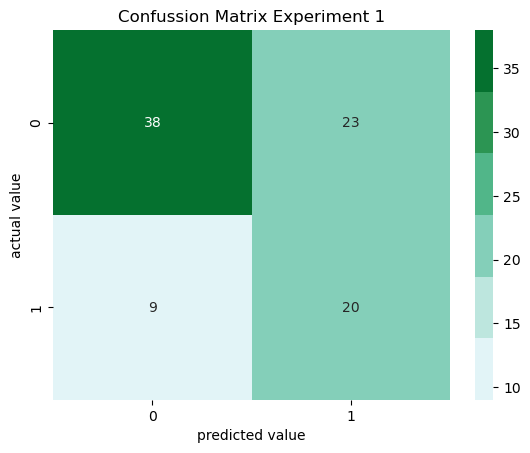

In [453]:
# Confussion Matrix

cunfus= confusion_matrix(y1_test,y1_pred_gb)
sns.heatmap(cunfus, annot=True, cmap=sns.color_palette('BuGn'))
plt.title('Confussion Matrix Experiment 1')
plt.xlabel('predicted value')
plt.ylabel('actual value')

plt.show()

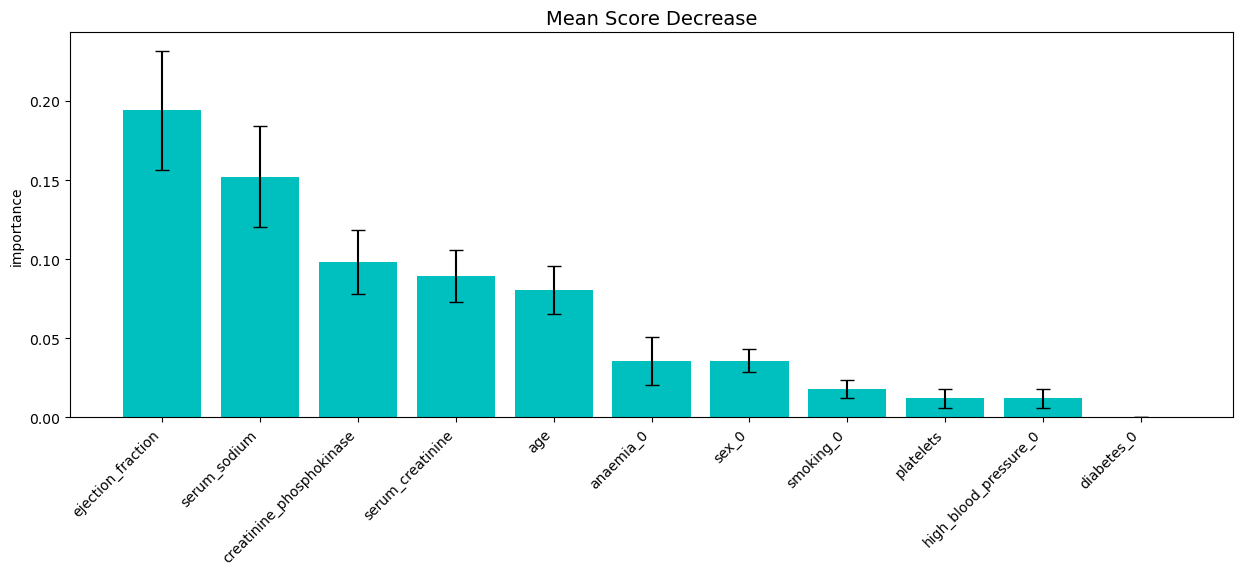

In [454]:
# Most Important variable based mean_score_decreased
from jcopml.feature_importance import mean_score_decrease

cek_gb= mean_score_decrease(x1_train, y1_train, gb_grid1, plot=True, topk=20)

In [455]:
gb_result1.best_params_['gamma']

0.2

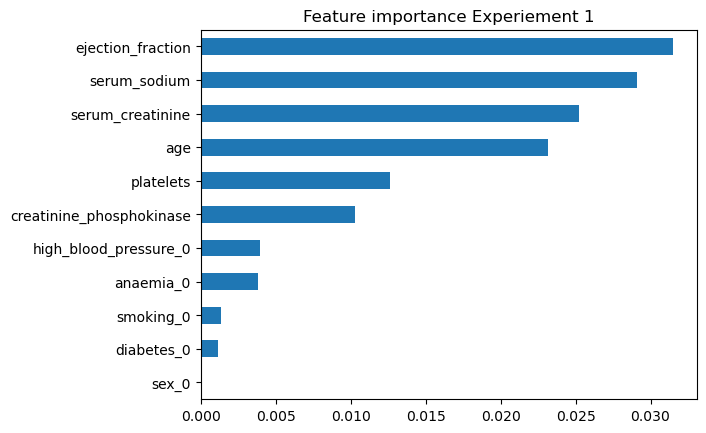

In [456]:
# The most important variables based on featured importance
gb_best1= gb_result1.best_params_
gb= XGBClassifier(gamma= gb_best1['gamma'], learning_rate=gb_best1['learning_rate'], max_depth=gb_best1['max_depth'],
                  n_estimators=gb_best1['n_estimators'], scale_pos_weight=gb_best1['scale_pos_weight'])
model1=gb.fit(x1_train,y1_train)

variable= X1.columns
fi= model1.feature_importances_
fi_data= pd.Series(abs(coef), index=variable)

fi_data.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature importance Experiement 1')

plt.show()

#### Experiment 2

In [457]:
# Evaluation of Model
from sklearn import metrics

y2_pred_gb= gb_grid2.predict(x2_test)

print(f'Accuarcy: {metrics.accuracy_score(y2_test,y2_pred_gb)}')
print(f'Recall: {metrics.recall_score(y2_test,y2_pred_gb)}')

Accuarcy: 0.6333333333333333
Recall: 0.5517241379310345


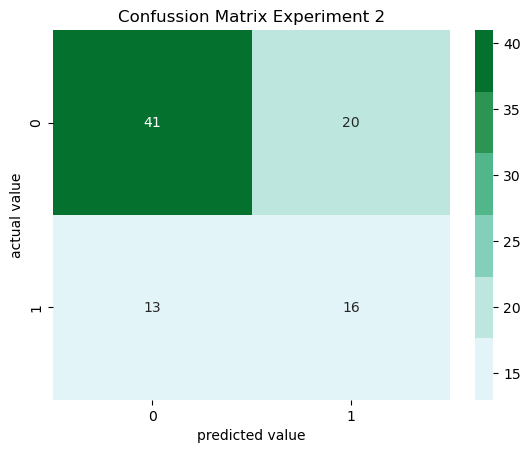

In [458]:
# Confussion Matrix

cunfus= confusion_matrix(y2_test,y2_pred_gb)
sns.heatmap(cunfus, annot=True, cmap=sns.color_palette('BuGn'))
plt.title('Confussion Matrix Experiment 2')
plt.xlabel('predicted value')
plt.ylabel('actual value')

plt.show()

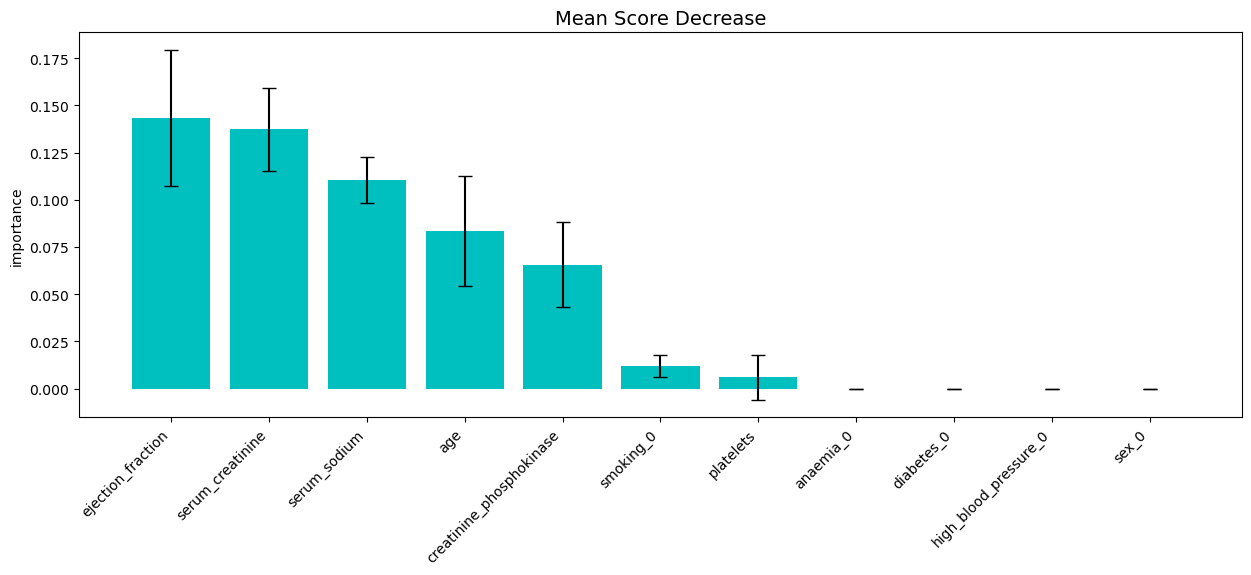

In [459]:
# Most Important variable based mean_score_decreased
from jcopml.feature_importance import mean_score_decrease

cek_gb2= mean_score_decrease(x2_train, y2_train, gb_grid2, plot=True, topk=20)

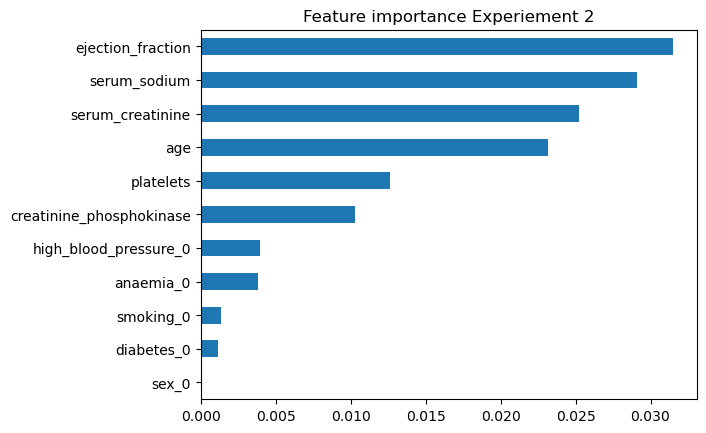

In [460]:
# The most important variables based on featured importance
gb_best2= gb_result2.best_params_
gb= XGBClassifier(gamma= gb_best2['gamma'], learning_rate=gb_best2['learning_rate'], max_depth=gb_best2['max_depth'],
                  n_estimators=gb_best2['n_estimators'], scale_pos_weight=gb_best2['scale_pos_weight'])
model2=gb.fit(x2_train,y2_train)

variable= X2.columns
fi= model2.feature_importances_
fi_data= pd.Series(abs(coef), index=variable)

fi_data.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature importance Experiement 2')

plt.show()

## **Result**

There is not any model can reach 0.70 in recall value. That indicate the model should missing many data that supposed to be Positive.Need more number of data from the patient or maybe another clinical factors such as weight or sport behavior.